In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import classification_report,roc_auc_score
import random as rn
rn.seed(42)
tf.random.set_seed(42)

In [2]:
alphabet= pd.read_csv('Alphabets_data.csv')
alphabet.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
alphabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
# we have 26 lables in output
alphabet.letter.nunique()

26

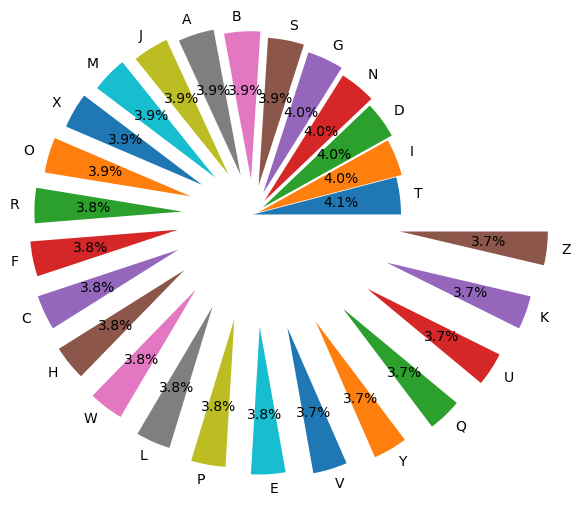

In [5]:
# data set is balanced one
plt.pie(alphabet.letter.value_counts(),labels=list(alphabet.letter.unique()),explode=np.linspace(0,1,26),autopct='%1.1f%%')
plt.show()

In [6]:
X=alphabet.iloc[:,1:]
Y=alphabet.iloc[:,0]

In [7]:
X

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [8]:
X.shape,Y.shape

((20000, 16), (20000,))

In [9]:
lable_encoder=LabelEncoder()
Y = lable_encoder.fit_transform(Y)

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [11]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((16000, 16), (16000,), (4000, 16), (4000,))

In [12]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [13]:
# initial model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(26, activation='softmax'))
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train,Y_train ,epochs=150,callbacks=keras.callbacks.EarlyStopping(patience=10)
                    ,validation_data=(X_test,Y_test), batch_size=32)

Epoch 1/150
500/500 [==============================] - 4s 4ms/step - loss: 2.8488 - accuracy: 0.1663 - val_loss: 2.2058 - val_accuracy: 0.3492
Epoch 2/150
500/500 [==============================] - 2s 3ms/step - loss: 1.8348 - accuracy: 0.4697 - val_loss: 1.5645 - val_accuracy: 0.5477
Epoch 3/150
500/500 [==============================] - 2s 3ms/step - loss: 1.4489 - accuracy: 0.5821 - val_loss: 1.3386 - val_accuracy: 0.6148
Epoch 4/150
500/500 [==============================] - 2s 3ms/step - loss: 1.2733 - accuracy: 0.6277 - val_loss: 1.2027 - val_accuracy: 0.6580
Epoch 5/150
500/500 [==============================] - 2s 3ms/step - loss: 1.1680 - accuracy: 0.6586 - val_loss: 1.1308 - val_accuracy: 0.6705
Epoch 6/150
500/500 [==============================] - 2s 3ms/step - loss: 1.0998 - accuracy: 0.6761 - val_loss: 1.0822 - val_accuracy: 0.6852
Epoch 7/150
500/500 [==============================] - 2s 3ms/step - loss: 1.0527 - accuracy: 0.6881 - val_loss: 1.0424 - val_accuracy: 0.6917

In [14]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size = 32)
loss_and_metrics

125/125 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.8100


[0.6334757804870605, 0.8100000023841858]

In [15]:
# Step 1: Make predictions on the test set
y_pred_probs = model.predict(X_test)

# Step 2: Convert probabilities to class labels (get the index of the max probability)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 3: Get the classification report
report = classification_report(Y_test, y_pred)

# Print the classification report
print(report)

125/125 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       158
           1       0.75      0.86      0.80       153
           2       0.80      0.87      0.83       147
           3       0.79      0.81      0.80       161
           4       0.73      0.77      0.75       154
           5       0.74      0.74      0.74       155
           6       0.78      0.67      0.72       155
           7       0.73      0.60      0.66       147
           8       0.84      0.77      0.80       151
           9       0.85      0.85      0.85       149
          10       0.77      0.78      0.77       148
          11       0.87      0.82      0.85       152
          12       0.88      0.93      0.90       158
          13       0.92      0.82      0.86       157
          14       0.74      0.82      0.78       150
          15       0.87      0.84      0.85       161
          16       0.74   

# Hyperparameter Tuning

In [15]:
def create_model(learning_rate,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim =X_train.shape[1] ,kernel_initializer ='uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(26,activation = 'softmax'))

    SDG = keras.optimizers.SGD(learning_rate=learning_rate,nesterov=True)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = SDG,metrics = ['accuracy'])
    return model

In [16]:
neuron1 = [30,40]
neuron2 = [28,38]
learning_rate = [0.01,0.1]
param_grids = dict(learning_rate = learning_rate,neuron1 = neuron1,neuron2 = neuron2)
model = KerasClassifier(build_fn = create_model,verbose = 0)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv =2,verbose = 10)
grid_result = grid.fit(X_train,Y_train,epochs=250,validation_split=0.30,callbacks=keras.callbacks.EarlyStopping(patience=10))

C:\Users\dushy\AppData\Local\Temp\ipykernel_22700\2763495881.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2; 1/8] START learning_rate=0.01, neuron1=30, neuron2=28..................
[CV 1/2; 1/8] END learning_rate=0.01, neuron1=30, neuron2=28;, score=0.843 total time= 2.7min
[CV 2/2; 1/8] START learning_rate=0.01, neuron1=30, neuron2=28..................
[CV 2/2; 1/8] END learning_rate=0.01, neuron1=30, neuron2=28;, score=0.836 total time= 2.7min
[CV 1/2; 2/8] START learning_rate=0.01, neuron1=30, neuron2=38..................
[CV 1/2; 2/8] END learning_rate=0.01, neuron1=30, neuron2=38;, score=0.859 total time= 2.7min
[CV 2/2; 2/8] START learning_rate=0.01, neuron1=30, neuron2=38..................
[CV 2/2; 2/8] END learning_rate=0.01, neuron1=30, neuron2=38;, score=0.854 total time= 2.7min
[CV 1/2; 3/8] START learning_rate=0.01, neuron1=40, neuron2=28..................
[CV 1/2; 3/8] END learning_rate=0.01, neuron1=40, neuron2=28;, score=0.861 total time= 2.7min
[CV 2/2; 3/8] START learning_rate=0.01, neuron1=40, neuron2=28...

In [17]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.8993124961853027, using {'learning_rate': 0.1, 'neuron1': 40, 'neuron2': 38}


In [19]:
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(50,input_dim =X_train.shape[1] ,kernel_initializer ='uniform',activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(40,input_dim = neuron1,kernel_initializer = 'uniform',activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(26,activation = 'softmax'))

    SDG = keras.optimizers.SGD(learning_rate=0.1,nesterov=True)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = SDG,metrics = ['accuracy'])
    return model

In [21]:
activation_function=['relu','tanh','leaky_relu']
param_grids = dict(activation_function=activation_function)
model = KerasClassifier(build_fn = create_model,verbose = 0)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv =2,verbose = 10)
grid_result = grid.fit(X_train,Y_train,epochs=250,validation_split=0.30,callbacks=keras.callbacks.EarlyStopping(patience=10))

C:\Users\dushy\AppData\Local\Temp\ipykernel_22700\2166456915.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2; 1/3] START activation_function=relu....................................
[CV 1/2; 1/3] END .....activation_function=relu;, score=0.910 total time=  42.4s
[CV 2/2; 1/3] START activation_function=relu....................................
[CV 2/2; 1/3] END .....activation_function=relu;, score=0.906 total time=  49.5s
[CV 1/2; 2/3] START activation_function=tanh....................................
[CV 1/2; 2/3] END .....activation_function=tanh;, score=0.911 total time= 1.1min
[CV 2/2; 2/3] START activation_function=tanh....................................
[CV 2/2; 2/3] END .....activation_function=tanh;, score=0.904 total time=  45.7s
[CV 1/2; 3/3] START activation_function=leaky_relu..............................
[CV 1/2; 3/3] END activation_function=leaky_relu;, score=0.902 total time=  49.2s
[CV 2/2; 3/3] START activation_function=leaky_relu..............................
[CV 2/2; 3/3] END activation_function=leaky_relu;

In [22]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.9081875085830688, using {'activation_function': 'relu'}


In [30]:
def create_model(neuron1,neuron2,neuron3):
    model = Sequential()
    model.add(Dense(neuron1,input_dim =X_train.shape[1] ,kernel_initializer ='uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron3,input_dim = neuron2,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(26,activation = 'softmax'))

    SDG = keras.optimizers.SGD(learning_rate=0.1,nesterov=True)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = SDG,metrics = ['accuracy'])
    return model

In [31]:
neuron1 = [40,60]
neuron2 = [60,80]
neuron3 = [80,100]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2,neuron3=neuron3,
                   epochs=[250],validation_split=[0.30],callbacks=[keras.callbacks.EarlyStopping(patience=10)])
model = KerasClassifier(build_fn = create_model,verbose = 0)
random = RandomizedSearchCV(estimator = model,param_distributions = param_grids,cv =2,verbose = 10,error_score='raise')
random_result = random.fit(X_train,Y_train)

C:\Users\dushy\AppData\Local\Temp\ipykernel_22700\3454940880.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2; 1/8] START callbacks=<keras.callbacks.EarlyStopping object at 0x000002546EEBE6D0>, epochs=250, neuron1=40, neuron2=60, neuron3=80, validation_split=0.3
[CV 1/2; 1/8] END callbacks=<keras.callbacks.EarlyStopping object at 0x000002546EEBE6D0>, epochs=250, neuron1=40, neuron2=60, neuron3=80, validation_split=0.3;, score=0.913 total time= 1.2min
[CV 2/2; 1/8] START callbacks=<keras.callbacks.EarlyStopping object at 0x000002546EEBE6D0>, epochs=250, neuron1=40, neuron2=60, neuron3=80, validation_split=0.3
[CV 2/2; 1/8] END callbacks=<keras.callbacks.EarlyStopping object at 0x000002546EEBE6D0>, epochs=250, neuron1=40, neuron2=60, neuron3=80, validation_split=0.3;, score=0.908 total time= 1.2min
[CV 1/2; 2/8] START callbacks=<keras.callbacks.EarlyStopping object at 0x000002546EEBE6D0>, epochs=250, neuron1=40, neuron2=60, neuron3=100, validation_split=0.3
[CV 1/2; 2/8] END callbacks=<keras.callbacks.EarlyStopping object at 0x0

In [32]:
print('Best : {}, using {}'.format(random_result.best_score_,random_result.best_params_))

Best : 0.926437497138977, using {'validation_split': 0.3, 'neuron3': 100, 'neuron2': 80, 'neuron1': 60, 'epochs': 250, 'callbacks': <keras.callbacks.EarlyStopping object at 0x000002546EEBE6D0>}


### inferances from HyperParameter tuning
* no of Neurons = as number of neurons increases the model learning capacity increases
* no of hidden layers = as number of layers increases the model learning capacity increases
* activation function = RELU activation function is doing better than tanh for this data
* epochs = if we continuosly increase epochs there is a chance to overfit the model so we use Early Stopping & validation data to decide number of epochs
* kernel_initializer = It decides how to assign weights to observation initialy so that model will converge better in training process
* Batch_size =Smaller batch sizes introduce more noise into the gradient estimates, which can help the model escape local minima and potentially lead to better generalization.Larger batch sizes may lead to faster convergence to a solution, but they can also lead to convergence to sharp minima, which may not generalize well to unseen data.
* Learning_rate = too low learning rate may lead to stuck in local minima & two high may overshoot
* Optimizers = Optimizers guide the model towards a minimum of the loss function, helping it converge to a solution that minimizes error.


# Final model

In [34]:
model = Sequential()
model.add(Dense(80,input_dim =X_train.shape[1] ,kernel_initializer ='uniform',activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(120,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(150,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(180,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(26,activation = 'softmax'))
# compile the keras model
SDG = keras.optimizers.SGD(learning_rate=0.1,nesterov=True)
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = SDG,metrics = ['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train,Y_train ,epochs=250,callbacks=keras.callbacks.EarlyStopping(patience=25)
                    ,validation_data=(X_test,Y_test), batch_size=32)

Epoch 1/250
500/500 [==============================] - 4s 5ms/step - loss: 3.2545 - accuracy: 0.0477 - val_loss: 3.2296 - val_accuracy: 0.1065
Epoch 2/250
500/500 [==============================] - 3s 5ms/step - loss: 2.5213 - accuracy: 0.2110 - val_loss: 1.8622 - val_accuracy: 0.3862
Epoch 3/250
500/500 [==============================] - 2s 5ms/step - loss: 1.5644 - accuracy: 0.4942 - val_loss: 1.1696 - val_accuracy: 0.6187
Epoch 4/250
500/500 [==============================] - 3s 5ms/step - loss: 1.1184 - accuracy: 0.6415 - val_loss: 0.8332 - val_accuracy: 0.7365
Epoch 5/250
500/500 [==============================] - 3s 5ms/step - loss: 0.8963 - accuracy: 0.7159 - val_loss: 0.6713 - val_accuracy: 0.7895
Epoch 6/250
500/500 [==============================] - 3s 5ms/step - loss: 0.7584 - accuracy: 0.7595 - val_loss: 0.5542 - val_accuracy: 0.8200
Epoch 7/250
500/500 [==============================] - 3s 5ms/step - loss: 0.6690 - accuracy: 0.7856 - val_loss: 0.5001 - val_accuracy: 0.8428

In [35]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size = 32)
loss_and_metrics

125/125 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9760


[0.07137313485145569, 0.9760000109672546]

# Evaluation
#### accuracy, precision, recall, and F1-
* As my Data contain Balanced classes so i used simple metric i.e 'accuracy' in training my model. if my data is imbalance i would have used  keras.metrics.F1Score(average='micro', threshold=None, name="f1_score", dtype=None)

In [36]:
# Step 1: Make predictions on the test set
y_pred_probs = model.predict(X_test)

# Step 2: Convert probabilities to class labels (get the index of the max probability)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 3: Get the classification report
report = classification_report(Y_test, y_pred)

# Print the classification report
print(report)

125/125 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.97      0.93      0.95       153
           2       0.99      0.99      0.99       147
           3       0.98      0.98      0.98       161
           4       0.95      0.99      0.97       154
           5       0.97      0.97      0.97       155
           6       0.99      0.98      0.98       155
           7       0.94      0.93      0.94       147
           8       0.96      0.91      0.93       151
           9       0.93      0.97      0.95       149
          10       0.94      0.98      0.96       148
          11       0.99      0.99      0.99       152
          12       1.00      0.99      1.00       158
          13       0.99      0.96      0.97       157
          14       0.99      0.98      0.98       150
          15       0.99      0.98      0.99       161
          16       0.97   

# How to Optimise Computational Expensiveness in Hyperparameter Tuning
* Checking few Hyperparameters Rather than All at once
* Using RandomizedSearchCV instead of GridSearchCV Because
* Search Space: GridSearchCV uses a fixed grid, while RandomizedSearchCV uses probability distributions.   
* Computational Cost: RandomizedSearchCV is often more efficient for large search spaces.   
* Efficiency: RandomizedSearchCV can find good hyperparameter settings with fewer evaluations.
* Best Use Cases: GridSearchCV is better for smaller search spaces and simpler models, while RandomizedSearchCV is better for larger search spaces and complex models.